In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
tf.random.set_seed(42)
# shape[1:] to get single example shape, without number of examples
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8752 - root_mean_squared_error: 0.9355 - val_loss: 0.4824 - val_root_mean_squared_error: 0.6945
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3883 - root_mean_squared_error: 0.6231 - val_loss: 2.9938 - val_root_mean_squared_error: 1.7303
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3946 - root_mean_squared_error: 0.6282 - val_loss: 0.9128 - val_root_mean_squared_error: 0.9554
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3506 - root_mean_squared_error: 0.5922 - val_loss: 0.3852 - val_root_mean_squared_error: 0.6206
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3391 - root_mean_squared_error: 0.5823 - val_loss: 1.5241 - val_root_mean_squared_error: 1.2346
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3410 - root_mean_squared_error: 0.5839 - val_loss: 1.3411 - val_

In [4]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
rmse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.2810 - root_mean_squared_error: 0.5301


0.530124306678772

In [5]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 103ms/step


array([[0.5054573],
       [1.0728302],
       [4.9569983]], dtype=float32)

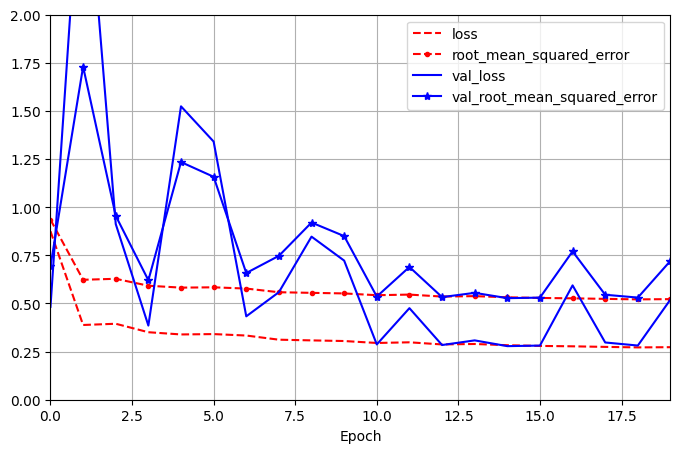

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 2], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()